# IAST examples

The IAST method is used to predict the composition of the adsorbed phase in a
multicomponent adsorption system, starting from pure component isotherms. First,
make sure the data is imported by running the import notebook.

In [1]:
# import isotherms
%run import.ipynb

# import the iast module
import pygaps
import pygaps.iast as pgi

import matplotlib.pyplot as plt
import numpy

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


## Using models

The IAST calculation is often performed by fitting a model to the isotherm
rather than on the isotherms themselves, as spreading pressure can be computed
efficiently when using most common models. Let's first fit the Langmuir model to
both isotherms.

Isotherm sample: MOF-5(Zn)
Attempting to model using Langmuir.
Model Langmuir success, RMSE is 0.901
Attempting to model using Langmuir.
Model Langmuir success, RMSE is 0.272


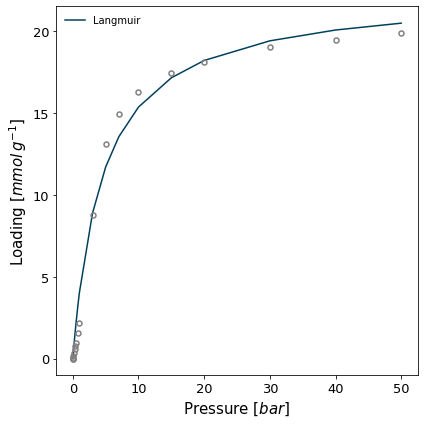

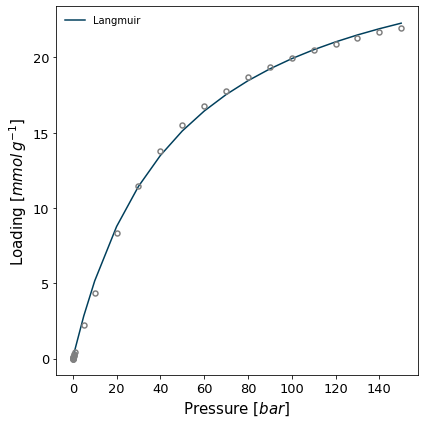

In [2]:
isotherms_iast_models = []

isotherm = next(i for i in isotherms_iast if i.material=='MOF-5(Zn)')
print('Isotherm sample:', isotherm.material)

for isotherm in isotherms_iast:
    model = pygaps.ModelIsotherm.from_pointisotherm(isotherm, model='Langmuir', verbose=True)
    isotherms_iast_models.append(model)

Now we can perform the IAST calculation with the resulting models. We specify
the partial pressures of each component in the gaseous phase to obtain the
composition of the adsorbed phase.

In [3]:
gas_fraction = [0.5, 0.5]
total_pressure = 10
pgi.iast_point_fraction(isotherms_iast_models, gas_fraction, total_pressure, verbose=True)

2 components.
	Partial pressure component 0 = 5
	Partial pressure component 1 = 5
Component 0
	p = 5
	p^0 = 5.71
	Loading = 11.01
	x = 0.8757
	Spreading pressure = 18.18
Component 1
	p = 5
	p^0 = 40.21
	Loading = 1.563
	x = 0.1243
	Spreading pressure = 18.18


array([11.0056369 ,  1.56267705])

Alternatively, if we are interested in a binary system, we can use the extension
functions `iast_binary_svp` and `iast_binary_vle` to obtain how the selectivity
changes based on pressure in a constant composition or, respectively, how the
gas phase-adsorbed phase changes with gas composition, at constant pressure.

These functions perform the IAST calculation at every point in the range passed
and can plot the results. If interested in the selectivity for one component in
an equimolar mixture over a pressure range:

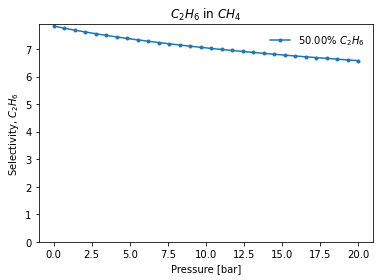

In [4]:
mole_fractions = [0.5, 0.5]
pressure_range = numpy.linspace(0.01, 20, 30)

result_dict = pgi.iast_binary_svp(
    isotherms_iast_models,
    mole_fractions,
    pressure_range,
    verbose=True,
)

Or if interested on a adsorbed - gas phase equilibrium line:

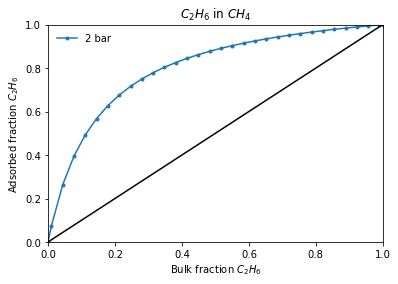

In [5]:
total_pressure = 2
result_dict = pgi.iast_binary_vle(
    isotherms_iast_models,
    total_pressure,
    verbose=True,
)

## Using isotherms directly - interpolation

The isotherms themselves can be used directly. However, instead of spreading
pressure being calculated from the model, it will be approximated through
interpolation and numerical quadrature integration.

In [6]:
gas_fraction = [0.5, 0.5]
total_pressure = 10
pgi.iast_point_fraction(
    isotherms_iast_models,
    gas_fraction,
    total_pressure,
    verbose=True,
)

2 components.
	Partial pressure component 0 = 5
	Partial pressure component 1 = 5
Component 0
	p = 5
	p^0 = 5.71
	Loading = 11.01
	x = 0.8757
	Spreading pressure = 18.18
Component 1
	p = 5
	p^0 = 40.21
	Loading = 1.563
	x = 0.1243
	Spreading pressure = 18.18


array([11.0056369 ,  1.56267705])

The binary mixture functions can also accept PointIsotherm objects.

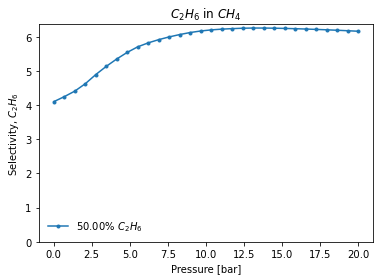

In [7]:
mole_fraction = [0.5, 0.5]
pressure_range = numpy.linspace(0.01, 20, 30)

result_dict = pgi.iast_binary_svp(
    isotherms_iast,
    mole_fraction,
    pressure_range,
    verbose=True,
)

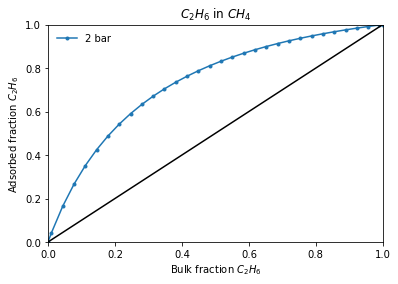

In [8]:
result_dict = pgi.iast_binary_vle(
    isotherms_iast,
    total_pressure=2,
    verbose=True,
)

More info about the method can be found in the [manual](https://pygaps.readthedocs.io/en/master/manual/iast.html).